## Practical 06

### Open and Convert Image to NumPy Array:

First, you need to open the image and convert it into a NumPy array. You can use the Pillow library for this.

In [5]:
from PIL import Image
import numpy as np

# Open the image
image = Image.open("dogs.jpeg")

# Convert the image to a NumPy array
img_array = np.array(image)
print(img_array)

[[[240 240 240]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[240 240 240]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[240 240 240]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 ...

 [[252 248 249]
  [254 250 251]
  [255 253 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[249 245 246]
  [252 248 249]
  [255 253 254]
  ...
  [255 255 255]
  [252 252 252]
  [244 244 244]]

 [[253 251 254]
  [253 251 254]
  [253 251 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]]


### Perform K-Means Clustering:

Next, you can use scikit-learn to perform K-Means clustering on the image.

In [6]:
from sklearn.cluster import KMeans

# Reshape the image to a 2D array of pixels
pixels = img_array.reshape(-1, 3)

# Perform K-Means clustering with k=3
kmeans = KMeans(n_clusters=3)
kmeans.fit(pixels)

# Get the cluster labels for each pixel
labels = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Predict Cluster Labels and Plot the Image:

Now, you can predict the cluster label for each pixel and create a new image based on these labels.

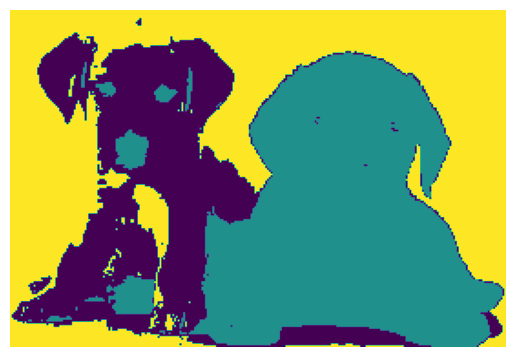

In [7]:
# Assign cluster labels to each pixel
segmented_image = labels.reshape(img_array.shape[:2])

# Display the segmented image
import matplotlib.pyplot as plt

plt.imshow(segmented_image)
plt.axis('off')
plt.show()


### Find Dominant Colors (Cluster Centers):

You can find the three dominant colors by accessing the cluster centers obtained from K-Means clustering.

In [8]:
# Get the cluster centers (dominant colors)
dominant_colors = kmeans.cluster_centers_

# Convert the dominant_colors to integers
dominant_colors = dominant_colors.astype(int)

# Display the dominant colors
for color in dominant_colors:
    color_hex = "#{:02x}{:02x}{:02x}".format(color[0], color[1], color[2])
    print("Dominant Color: ", color_hex)


Dominant Color:  #d2ae8f
Dominant Color:  #1d1514
Dominant Color:  #fbf7f3


### Graph Based Clustering

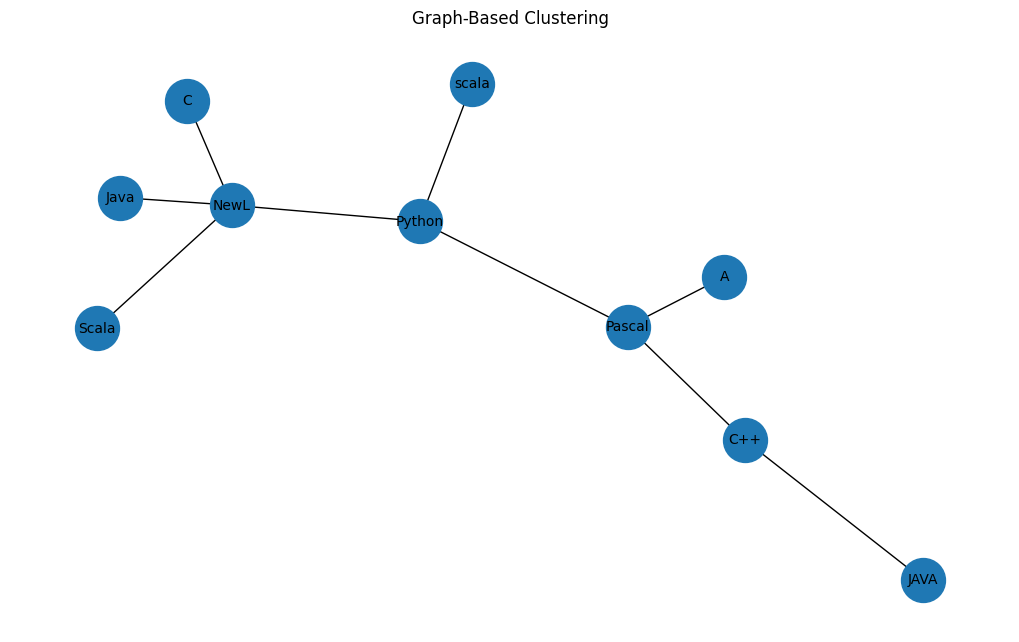

Consistent Edges:
NewL - Scala
Pascal - Python
Python - scala
C++ - JAVA

Inconsistent Edges:
Java - NewL
NewL - C
NewL - Python
Pascal - A
Pascal - C++

Suggestions for learning NewL:
['Java', 'C', 'Python', 'Scala']


In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add edges with weights
G.add_edge("C++", "JAVA", weight=4)
G.add_edge("C++", "C", weight=6)
G.add_edge("C++", "Pascal", weight=16)
G.add_edge("Java", "NewL", weight=24)
G.add_edge("C", "NewL", weight=23)
G.add_edge("C", "Python", weight=5)
G.add_edge("C", "Pascal", weight=8)
G.add_edge("Python", "NewL", weight=18)
G.add_edge("Python", "scala", weight=11)
G.add_edge("Python", "Pascal", weight=10)
G.add_edge("Scala", "NewL", weight=9)
G.add_edge("Scala", "A", weight=7)
G.add_edge("Pascal", "A", weight=21)

# Find MST
mst = nx.minimum_spanning_tree(G)

#graph-based clustering using deletion of inconsistent edges
sorted_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)
clustered_graph = nx.Graph()

for edge in sorted_edges:
    node1, node2, edge_data = edge
    if not clustered_graph.has_node(node1):
        clustered_graph.add_node(node1)
    if not clustered_graph.has_node(node2):
        clustered_graph.add_node(node2)

    if not nx.has_path(clustered_graph, node1, node2):
        clustered_graph.add_edge(node1, node2, weight=edge_data['weight'])

#clustered graph
pos = nx.spring_layout(clustered_graph)
plt.figure(figsize=(10, 6))
nx.draw(clustered_graph, pos, with_labels=True, font_size=10, node_size=1000)
plt.title("Graph-Based Clustering")
plt.show()

average_weight = sum([edge[2]['weight'] for edge in clustered_graph.edges(data=True)]) / len(clustered_graph.edges())
consistent_edges = [(edge[0], edge[1]) for edge in clustered_graph.edges(data=True) if edge[2]['weight'] <= average_weight]
inconsistent_edges = [(edge[0], edge[1]) for edge in clustered_graph.edges(data=True) if edge[2]['weight'] > average_weight]

print("Consistent Edges:")
for edge in consistent_edges:
    print(f"{edge[0]} - {edge[1]}")

print("\nInconsistent Edges:")
for edge in inconsistent_edges:
    print(f"{edge[0]} - {edge[1]}")

# Suggestions for learning NewL
newl_cluster = [node for node in clustered_graph.neighbors("NewL")]
print("\nSuggestions for learning NewL:")
print(newl_cluster)